In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython import display
import matplotlib.cm as cm
import os
import time
from PIL import Image
from time import time

# Task 1

In [ ]:
def bifurcation_map(r, n):
    x = [0.9]
    for i in range(n):
        x.append(r*x[i]*(1 - x[i]))  
    return x

In [ ]:
x = bifurcation_map(2.95,100)
plt.plot(x, 'b')

In [ ]:
r = np.linspace(0,4,100)

In [ ]:
%time
x = []
for value in r:
    x.append(bifurcation_map(value, n = 1000)[-100:])

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(r, x);

In [ ]:
%time
t = time()
r = np.linspace(0,4,10000)
x = []
for value in r:
    x.append(bifurcation_map(value, n = 1000)[-100:])
print(time()-t)

In [ ]:
f = open("task.py", "r")
print(f.read())
f.close()

In [ ]:
%time
t = time()
!mpirun -n 2 python task.py
print(time()-t)

In [ ]:
Time = []
for i in range(1,10):
    t = time()
    !mpiexec -n {i} python task.py
    Time.append(time()-t)
    print('Working time:' ,Time[-1])

In [ ]:
plt.subplot(221)
plt.plot(range(1,10), Time,'o-')
plt.title('Time of execution')
plt.xlabel('Number of processes')
plt.ylabel('Time(sec)')
plt.grid()


plt.subplot(222)
plt.plot(range(1,10), [1/i*9 for i in Time],'o-')
plt.title('Speedup versus number of processors')
plt.xlabel('Number of processes')
plt.ylabel('Speedup')
plt.grid()

plt.subplots_adjust(top=2.92, bottom=0.28, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)

plt.show()

# Task 6

In [ ]:
%pylab inline

In [ ]:
# generate the signal
nofts=1000
t=np.linspace(-20*2*pi, 20*2*pi, 20000)
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5)**2/2/20**2)
y=y+np.sin(5*t)*exp(-(t-10)**2/2/10**2)

plt.plot(t/2/pi,y)

xlabel('t, cycles')
ylabel('signal, arb.units')

In [ ]:
# Fourier spectrum
sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plot(w, abs(sp)**2)
xlim(0,6)
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')

In [ ]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=2.0*2*pi
window_position=0.0*2*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y*window_function

plot(t/2/pi, y)
plot(t/2/pi, y_window)

# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum

In [ ]:
window_width=2.0*2*pi
window_position=0.5*2*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y*window_function

plot(t/2/pi, y)
plot(t/2/pi, y_window)

In [ ]:
window_width=2.0*2*pi
window_position=1.5*3*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y*window_function

plot(t/2/pi, y)
plot(t/2/pi, y_window)

In [ ]:
window_width=2.0*2*pi
window_position=1.5*5*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y*window_function

plot(t/2/pi, y)
plot(t/2/pi, y_window)

In [ ]:
window_width=2.0*2*pi
window_position=1.5*8*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y*window_function

plot(t/2/pi, y)
plot(t/2/pi, y_window)

In [ ]:
def my_plot(x, y, title, xlabel, ylabel, fig_x_size = 8, fig_y_size = 5, font_param = 20):
    plt.figure(figsize=(fig_x_size, fig_y_size))
    plt.plot(x, y, "g.--")    
    plt.title(title, fontsize = font_param * 1.3)
    plt.xlabel(xlabel, fontsize = font_param)
    plt.ylabel(ylabel, fontsize = font_param)
    plt.xticks(fontsize = font_param)
    plt.yticks(fontsize = font_param)
    
        
def my_imshow(x, y, z, 
              title, 
              xlabel, 
              ylabel,
              name = '1',
              showplt = True,
              grid_active = False, fig_x_size = 15, fig_y_size = 10, font_param = 20):
    
    plt.figure(figsize=(fig_x_size, fig_y_size))
    plt.imshow(z, aspect='auto', 
               origin='lower', 
               extent=[min(x)/2/pi, max(x)/2/pi, y[0], 2 * w[int(len(x)/2)-1]])
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=font_param)
    plt.title(title, fontsize = font_param * 1.3)
    plt.xlabel(xlabel, fontsize = font_param)
    plt.ylabel(ylabel, fontsize = font_param)
    plt.xticks(fontsize = font_param)
    plt.yticks(fontsize = font_param)
    plt.grid(grid_active)
    plt.ylim(0, 10)
    plt.savefig('Spectogram'+name+'.png')
    if showplt:
        plt.show()
    

# signal consits of wave packets of three harmonic signals
def form_signal(n_timestamps = 4096):
    t=np.linspace(-20*2*pi, 20*2*pi, n_timestamps)
    y=np.sin(t)*exp(-t**2/2/20**2) #generate first  wave packets of harmonic signal
    y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2) #add      second wave packets of harmonic signal
    y=y+np.sin(5*t)*exp(-(t-10*2*pi)**2/2/10**2) #add      third  wave packets of harmonic signal
    #frequency=4 
    #time_shift=7 
    y=y+np.sin(7*t)*exp(-(t-4*2*pi)**2/2/10**2)  #add      fouth  wave packets of harmonic signal
    return t, y

t,y = form_signal()
my_plot(t / 2 / np.pi, y, title = "Discretized signal plotting", xlabel = 't, cycles', ylabel = 'signal, arb.units')
plt.show()

In [ ]:
# Fourier spectrum
sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
# plot(w, abs(sp)**2)

my_plot(w, abs(sp)**2, title = "Amplitude-Frequency Power (AFP) characteristic", xlabel = 'Frequency, arb. units', ylabel = 'Power spectrum, arb. units')
plt.xlim(0, 8)
plt.show()

In [ ]:
t1,y1 = form_signal(4096*8)
my_plot(t1 / 2 / np.pi, y1, title = "Discretized signal plotting", xlabel = 't, cycles', ylabel = 'signal, arb.units')
plt.show()

# Fourier spectrum
sp1=fft.fft(y1)
w1=fft.fftfreq(len(y1), d=(t1[1]-t1[0])/2/pi)
# plot(w, abs(sp)**2)

my_plot(w1, abs(sp1)**2, title = "Amplitude-Frequency Power (AFP) characteristic", xlabel = 'Frequency, arb. units', ylabel = 'Power spectrum, arb. units')
plt.xlim(0, 8)
plt.show()

In [ ]:
t1,y1 = form_signal(4096/4)
my_plot(t1 / 2 / np.pi, y1, title = "Discretized signal plotting", xlabel = 't, cycles', ylabel = 'signal, arb.units')
plt.show()

# Fourier spectrum
sp1=fft.fft(y1)
w1=fft.fftfreq(len(y1), d=(t1[1]-t1[0])/2/pi)
# plot(w, abs(sp)**2)

my_plot(w1, abs(sp1)**2, title = "Amplitude-Frequency Power (AFP) characteristic", xlabel = 'Frequency, arb. units', ylabel = 'Power spectrum, arb. units')
plt.xlim(0, 8)
plt.show()

#### Explain, why the "hats" of signal and AFP may be sharp

- because of low discritization

In [ ]:
my_plot(w, abs(sp)**2, title = "Amplitude-Frequency Power (AFP) characteristic", xlabel = 'Frequency, arb. units', ylabel = 'Power spectrum, arb. units')
plt.xlim(0.87, 1.1)
plt.show()

In [ ]:
my_plot(w, abs(sp)**2, title = "Amplitude-Frequency Power (AFP) characteristic", xlabel = 'Frequency, arb. units', ylabel = 'Power spectrum, arb. units')
plt.xlim(4.81, 5.2)
plt.show()

- AFP provides us with information about amplitudes of separated harmonic signals (spectral analysis)
- AFP does not give information about the frequency and amplitude depence on time .

In [ ]:
def window_function(t, window_position, window_width):
    return exp(- (t - window_position) ** 2 / 2 / window_width ** 2)


def get_specgram(window_width, nwindowsteps = 1000):
    t_window_positions=linspace(-20 * 2 * pi, 20 * 2 * pi, nwindowsteps)

    specgram = np.empty([len(t), len(t_window_positions)])

    for i,t_window_position in enumerate(t_window_positions):
        y_window=y * window_function(t, t_window_position, window_width)
        #plot(y_window)
        specgram[:,i]=abs(fft.fft(y_window))

    return specgram


def repeat_function(window_width, nwindowsteps = 1000, repetitions = 100):
    for _ in range(repetitions):
        get_specgram(window_width = window_width, 
                     nwindowsteps = nwindowsteps)

* <b> STFT </b> provides us with information about the frequency and amplitude depence <strong> on time </strong> (specgram).
* vary $\operatorname{kappa} = \overline{0.1, \,10}$, write down results into gif (add in title of picture values of kappa), and explain, why specgram is different.

In [ ]:
kappa = 1
window_width_given = kappa * 2 * pi
nwindowsteps_given = 1000

my_imshow(t, w, get_specgram(window_width = window_width_given,
                             nwindowsteps = nwindowsteps_given), 
          title = "Specgram", 
          xlabel = "t, cycles", 
          ylabel = "Frequency, arb. units")
# clim(0,0.5)
plt.ylim(0, 10)
plt.show()

In [ ]:
kappa = 0.001
window_width_given = kappa * 2 * pi
nwindowsteps_given = 1000

my_imshow(t, w, get_specgram(window_width = window_width_given,
                             nwindowsteps = nwindowsteps_given), 
          title = "Specgram", 
          xlabel = "t, cycles", 
          ylabel = "Frequency, arb. units")
# clim(0,0.5)
plt.ylim(0, 10)
plt.show()

In [ ]:
kappa = 10
window_width_given = kappa * 2 * pi
nwindowsteps_given = 1000

my_imshow(t, w, get_specgram(window_width = window_width_given,
                             nwindowsteps = nwindowsteps_given), 
          title = "Specgram", 
          xlabel = "t, cycles", 
          ylabel = "Frequency, arb. units")
# clim(0,0.5)
plt.ylim(0, 10)
plt.show()

In [ ]:
import math
import imageio
# with imageio.get_writer('/path/to/movie.gif', mode='I') as writer:
i = 0
for theta in linspace(math.log(0.001), math.log(10), 20):
        kappa=math.exp(theta)

        window_width_given = kappa * 2 * pi
        nwindowsteps_given = 1000

        image = my_imshow(t, w, get_specgram(window_width = window_width_given,
                                     nwindowsteps = nwindowsteps_given), 
                  title = "Specgram Kappa:"+str(kappa), 
                  xlabel = "t, cycles", 
                  ylabel = "Frequency, arb. units",
                  name = str(i), 
                  showplt = False)
        i+=1

#             writer.append_data(image)

    

In [ ]:
flnames = []
images = []
for i in range(100):
    flnames.append('Spectogram' +str(i)+'.png')
for filename in flnames:
        images.append(imageio.imread(filename))

In [ ]:
imageio.mimsave('spectograma' +'.gif', images)

In [ ]:
from IPython.display import Image
Image('spectograma.gif')

Vary n_timestamps_given=4090, 4091, ...,5000 and plot results of computational time on the graph.

In [ ]:
window_width_given = 1 * 2 * pi
nwindowsteps_given = 1000
repetitions_given = 100

n_timestamps_given = 4096

t, y = form_signal(n_timestamps = n_timestamps_given)

- ncalls – это количество совершенных вызовов;
- tottime – это все время, потраченное в данной функции;
- percall – ссылается на коэффициент tottime, деленный на ncalls;
- cumtime – совокупное время, потраченное как в данной функции, так и наследуемых функциях. Это работает также и с рекурсивными функциями!
- Второй столбец percall – это коэффициент cumtime деленный на примитивные вызовы;
- filename:lineno(function) предоставляет соответствующие данные о каждой функции.

In [ ]:
import cProfile
%pylab inline

cProfile.run('repeat_function(   window_width = ' + str(window_width_given) + ',' +
                                'nwindowsteps = ' + str(nwindowsteps_given) + ',' +
                                'repetitions  = ' + str(repetitions_given ) +       ')' )

In [ ]:
window_width_given = 1 * 2 * pi
nwindowsteps_given = 1000
repetitions_given = 100

n_timestamps_given = 5000

t, y = form_signal(n_timestamps = n_timestamps_given)

    

cProfile.run('repeat_function(   window_width = ' + str(window_width_given) + ',' +
                                'nwindowsteps = ' + str(nwindowsteps_given) + ',' +
                                'repetitions  = ' + str(repetitions_given ) +       ')' )

In [ ]:
n_timestamps_given_list = np.linspace(4090, 5000, 10)
Time = []
for n_timestamps in n_timestamps_given_list:
    time_start = time()
    window_width_given = 1 * 2 * pi
    nwindowsteps_given = 1000
    repetitions_given = 100
    n_timestamps_given = n_timestamps
    t, y = form_signal(n_timestamps = n_timestamps_given)
    repeat_function(window_width_given, nwindowsteps_given, repetitions_given)
    Time.append(time()-time_start)
    

In [ ]:
plt.plot(n_timestamps_given_list,Time)
plt.ylabel('time')
plt.xlabel('n_timestamps_given')
plt.title('results of computational time')
plt.grid()

In [ ]:
f = open("spectra.py", "r")
print(f.read())
f.close()

In [ ]:
Time = []
for i in range(0,10):
    t = time()
    !mpiexec -n {i} python spectra.py
    Time.append(time()-t)
    print('Working time:' ,Time[-1])

In [ ]:
plt.subplot(221)
plt.plot(range(0,10), Time,'o-')
plt.title('Time of execution')
plt.xlabel('Number of processes')
plt.ylabel('Time(sec)')
plt.grid()


plt.subplot(222)
plt.plot(range(0,10), [1/i*10 for i in Time],'o-')
plt.title('Speedup versus number of processors')
plt.xlabel('Number of processes')
plt.ylabel('Speedup')
plt.grid()

plt.subplots_adjust(top=2.92, bottom=0.28, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)

plt.show()

# Task 7

* <big> $ S = \displaystyle \int_a^b  \displaystyle \frac{1}{\sqrt{1 + x^2}} \, dx$ </big>, where $a = 5$ and $b = 7$
1. Compute analytically the value of $S$
2. Provide a parallel numerical computation of the integral $S$ using, for example, the trapezoidal approximation $\displaystyle \int_{a}^{b} f(x) \approx S_D = \displaystyle \sum_{k = 1}^{N-1} \displaystyle \frac{f\left(a + k \,\tau\right)+ f\left(a + \left(k - 1\right) \tau\right) }{2}\,\,\tau$, where $ a + (N - 1)\tau = b$
  * The number of MPI processes $n_p$ does not depend on the number of discretization points $N$, i.e., $n_p \ne N$ in general. 
  * Use <strong>Reduce </strong> function of <i>mpi4py </i> to sum across processes.
3. Plot the speedup $s(n_p)$ for a parallel version of program for different number of processes $n_p$. The speedup is determined by $s(n_p) = \displaystyle \frac{t_p(n_p)}{t_s}$, where $t_s$ and $t_p(n_p)$ are computational times of sequential and parallel versions of program.
4. Plot the error value $e(\tau) = |S_D(\tau) - S| $ versus discretization step graph $\tau$ by varying number of discretization steps $N$.

<b> Bonus task. </b> 
* Implement the Monte Carlo method and compare with the trapezoidal method in terms of errors. 
* When the Monte Carlo method works better than the trapezoidal one?

In [ ]:
def integral(a,b):
    return np.log(b + np.sqrt(b**2 + 1**2)) - np.log(a + np.sqrt(a**2 + 1**2))

print('Answer:', integral(a = 5,b = 7))

In [ ]:
def trapezoidal(f, a, b, n):
    h = (b-a)/float(n)
    s = 0.5*(f(a) + f(b))
    for i in range(1,n,1):
        s = s + f(a + i*h)
    return h*s

def func(x):
    return 1/(np.sqrt(1 + x**2))

print('Answer:', trapezoidal(func, a = 5, b = 7, n = 10000))

In [ ]:
t = time()
!mpirun -n 2 python integral.py
print('time:', time()-t)

In [ ]:
f = open("integral.py", "r")
print(f.read())
f.close()

In [ ]:
Time = []
for i in range(0,10):
    t = time()
    !mpiexec -n {i} python integral.py
    Time.append(time()-t)
    print('Working time:' ,Time[-1])

In [ ]:
plt.subplot(221)
plt.plot(range(0,10), Time,'o-')
plt.title('Time of execution')
plt.xlabel('Number of processes')
plt.ylabel('Time(sec)')
plt.grid()


plt.subplot(222)
plt.plot(range(0,10), [1/i*10 for i in Time],'o-')
plt.title('Speedup versus number of processors')
plt.xlabel('Number of processes')
plt.ylabel('Speedup')
plt.grid()

plt.subplots_adjust(top=2.92, bottom=0.28, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)

plt.show()

In [ ]:
errors = []
for i in range(1,10):
    errors.append( trapezoidal(func, 5, 7, i) - integral(5,7))
    
plt.plot(range(1,10), errors,'o-')
plt.grid()
plt.title('Errors between analytically and trapezoidal approximation ')
plt.xlabel('n')

# Task 9

In [71]:
from scipy.signal import correlate2d as conv2d

def numpy_update(alive_map):
    # Count neighbours with convolution
    conv_kernel = np.array([[1,1,1],
                            [1,0,1],
                            [1,1,1]])
    
    num_alive_neighbors = conv2d(alive_map, conv_kernel, mode='same')
    #print('numpy = ', num_alive_neighbors)
    
    # Apply game rules
    born = np.logical_and(num_alive_neighbors == 3, alive_map == 0)
    #print(born)
    survived = np.logical_and(np.isin(num_alive_neighbors, [2,3]), alive_map == 1)
    
    #print(np.logical_or(born, survived))
    np.copyto(alive_map, np.logical_or(born, survived))

<IPython.core.display.Javascript object>


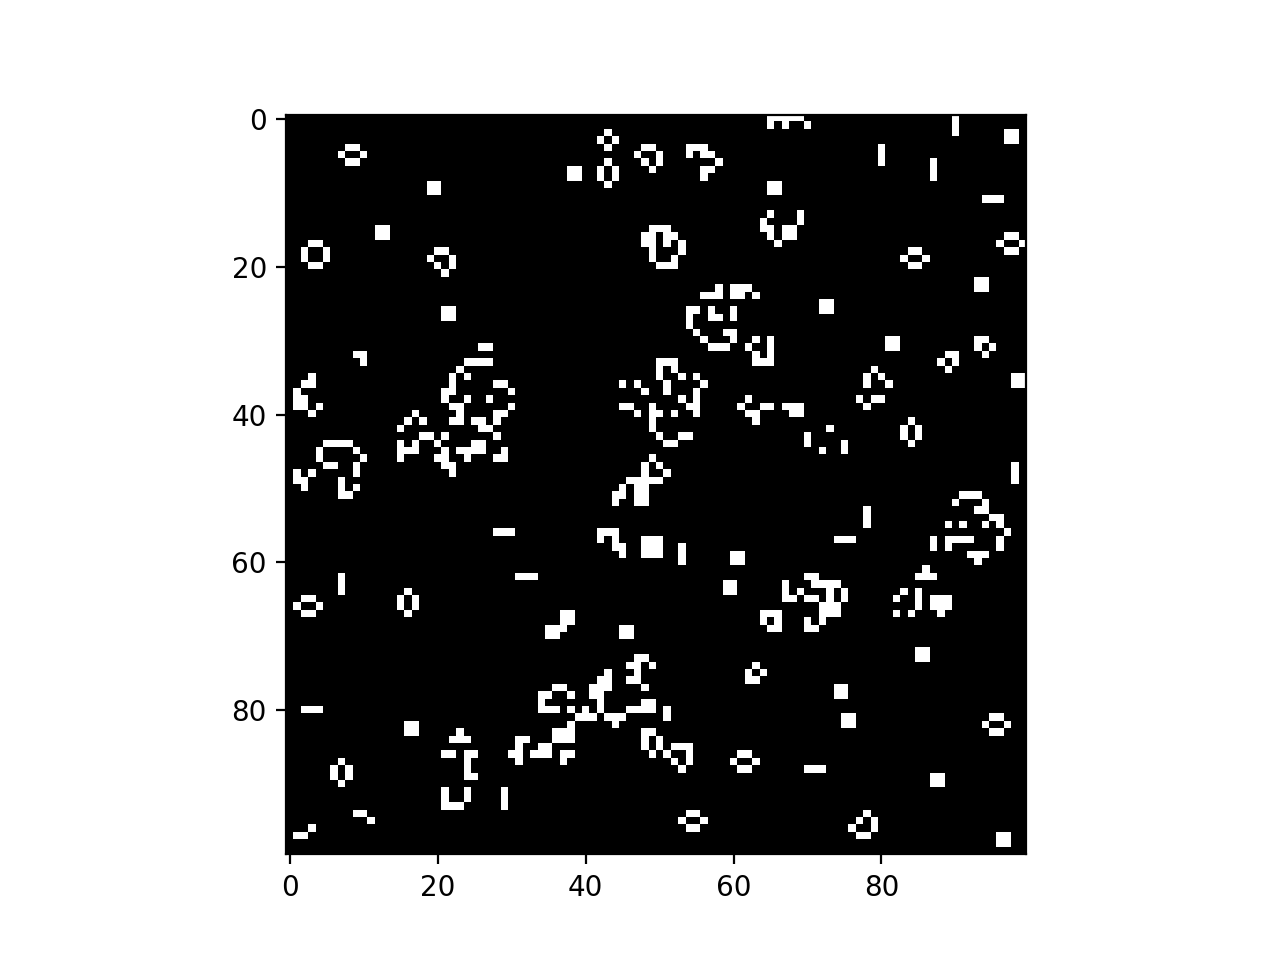

time: 5.040729999542236


In [72]:
from time import time
%matplotlib notebook
plt.ion()

# initialize game field
alive_map = np.random.choice([0, 1], size=(100, 100))

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()


start1 = []
t = time()
for _ in range(100):
    numpy_update(alive_map)
    start1.append(np.count_nonzero(alive_map == 1))
    # re-draw image
    ax.clear()
    ax.imshow(alive_map, cmap='gray')
    fig.canvas.draw()
print('time:', time()-t)

In [89]:
from time import time
t = time()
!mpirun -n 2 python game.py
print('time:', time()-t)

time: 1.926764965057373


<IPython.core.display.Javascript object>


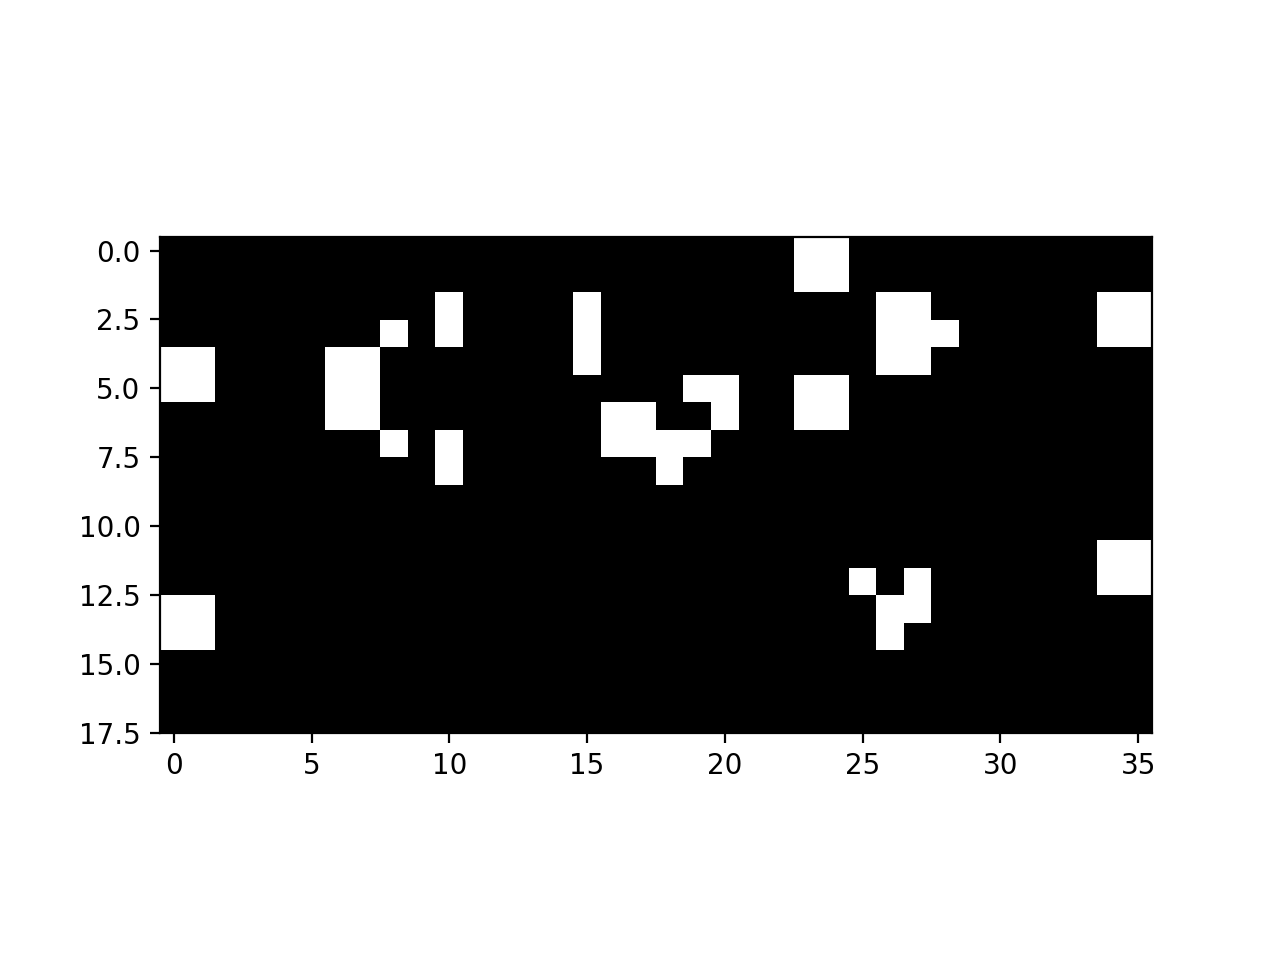

time: 5.942346096038818


In [74]:
# initialize game field
alive_map = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      
  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

start2 = []
t = time()
for _ in range(100):
    numpy_update(alive_map)
    start2.append(np.count_nonzero(alive_map == 1))
    # re-draw image
    ax.clear()
    ax.imshow(alive_map, cmap='gray')
    fig.canvas.draw()
print('time:', time()-t)

<IPython.core.display.Javascript object>


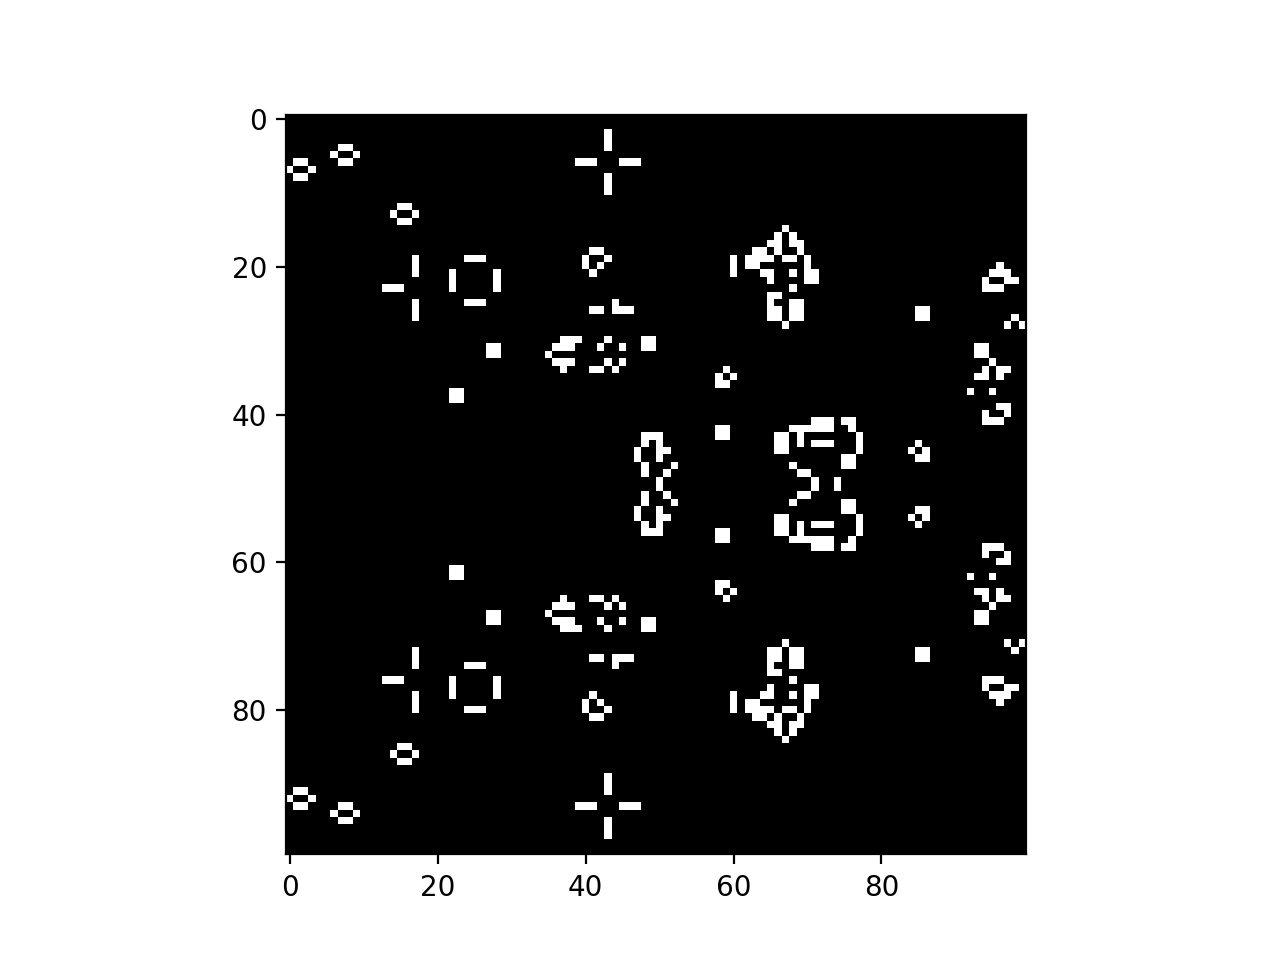

In [76]:
alive_map = np.arange(100) % 2 + np.zeros([100, 100])
alive_map[48:52, 50] = 1

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

start3 = []
for _ in range(300):
    numpy_update(alive_map)
    start3.append(np.count_nonzero(alive_map == 1))
    ax.clear()
    ax.imshow(alive_map, cmap='gray')
    fig.canvas.draw()


<IPython.core.display.Javascript object>


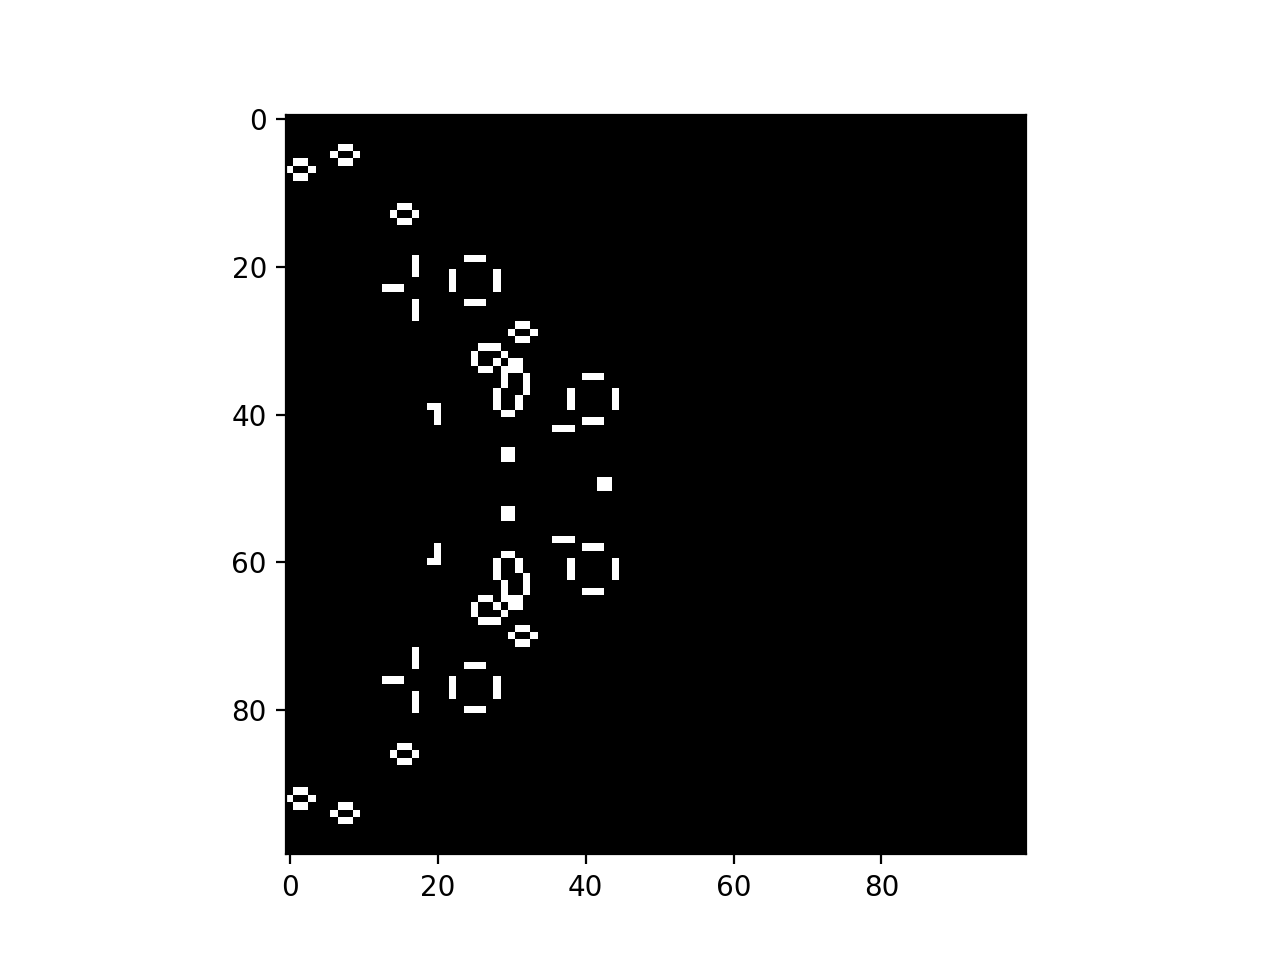

In [80]:
alive_map = np.arange(100) % 2 + np.zeros([100, 100])
#alive_map[48:52, 50] = 1

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

start4 = []
for _ in range(150):
    numpy_update(alive_map)
    start4.append(np.count_nonzero(alive_map == 1))
    ax.clear()
    ax.imshow(alive_map, cmap='gray')
    fig.canvas.draw()

<IPython.core.display.Javascript object>


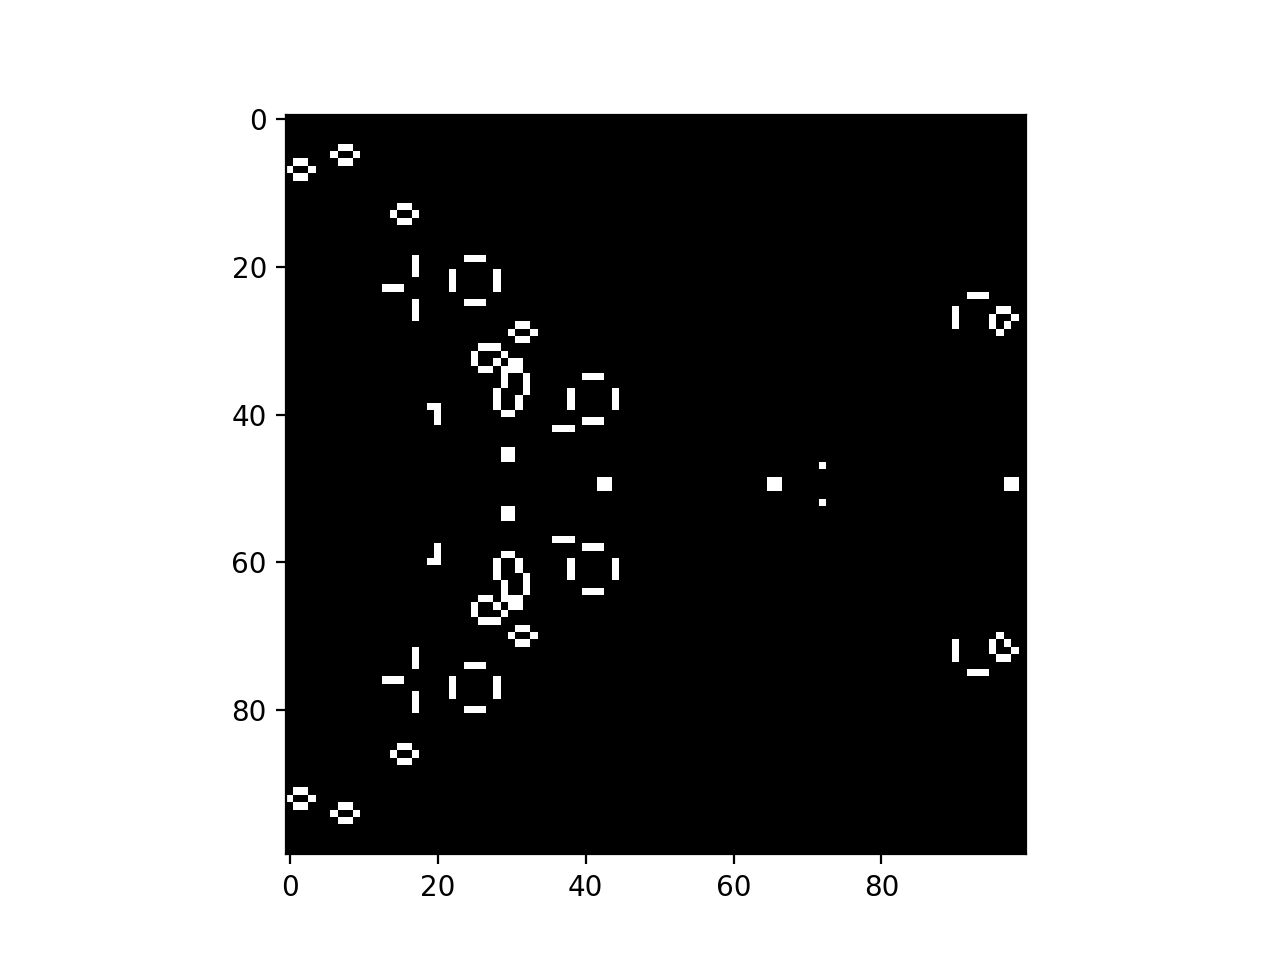

In [78]:
alive_map = np.arange(100) % 2 + np.zeros([100, 100])
alive_map[48:52, 99] = 0

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

start5 = []
for _ in range(150):
    numpy_update(alive_map)
    start5.append(np.count_nonzero(alive_map == 1))
    ax.clear()
    ax.imshow(alive_map, cmap='gray')
    fig.canvas.draw()

<IPython.core.display.Javascript object>


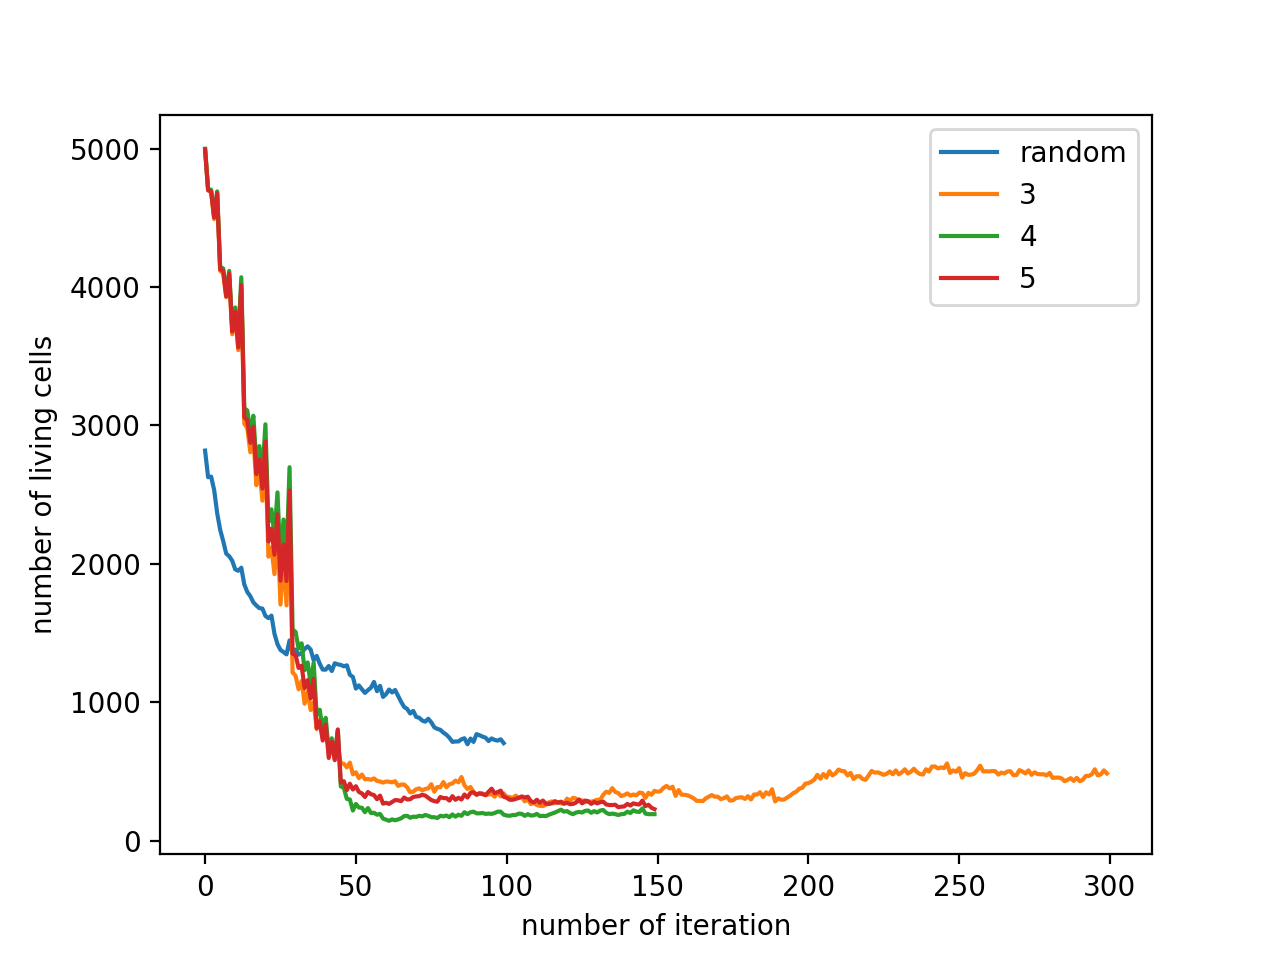

In [79]:
%matplotlib notebook
plt.plot(start1, label = 'random')
plt.plot(start3, label = '3')
plt.plot(start4, label = '4')
plt.plot(start5, label = '5')
plt.legend()
plt.xlabel('number of iteration')
plt.ylabel('number of living cells')
plt.show()

# Task 8

* Divide a picture into roughly equal blocks of columns. Each process takes its own block. The number of columns $N$ is not equal to the number of processes $n_p$, i.e., $N \ne n_p$ in general.
* Create $N$ new pictures by cyclically shifting the columns of pixels. E.g., for $N = 3 $: $[c_0, c_1, c_2] \rightarrow [c_2, c_0, c_1] \rightarrow [c_1, c_2, c_0]$

In [ ]:
from PIL import Image
img = Image.open('dog.jpeg')

In [ ]:
img

In [ ]:
img_array = np.asarray(img)[:,:,0]

In [ ]:
img_array

In [ ]:
from PIL import Image
import memory_profiler as mem_profile
import os
import psutil
process = psutil.Process(os.getpid())

%load_ext memory_profiler
%memit
x = img_array 
for i in range(200):
    x = np.roll(x, -1, axis=1)
    img = Image.fromarray(x)
    img.save('doggy' + str(i) + '.png')
print(process.memory_info().rss)

In [ ]:
import imageio
images = []
filenames = []
for i in range(1,200):
    name = 'doggy' + str(i)  +'.png'
    filenames.append(name)
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('doggy.gif', images)
from IPython.display import Image
#Image(filename='doggy.gif')

In [ ]:
Image(filename='doggy.gif')

In [ ]:
img_array

In [ ]:
for i in range(1,20):
    print('________')
    print(img_array[:,int(r_0)+i:int(r_1)+i])
    print('________')

In [ ]:
image = np.array_split(img_array,4,axis=1)[0]

In [ ]:
image

In [ ]:
image

In [ ]:
from PIL import Image
x = image
for i in range(20):
    x = np.roll(x, -1, axis=1)
    img = Image.fromarray(x)
    img.save('doggy_proverka' + str(i) + '.png')

In [ ]:
images = []
filenames = []
for i in range(1,20):
    name = 'doggy_proverka' + str(i)  +'.png'
    filenames.append(name)
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('doggy_proverka.gif', images)
from IPython.display import Image
Image(filename='doggy_proverka.gif')

In [ ]:
from PIL import Image
image = np.array_split(img_array,4,axis=1)[1]
x = image
for i in range(20):
    print('old = ', x)
    x = np.roll(x, -1, axis=1)
    print('new =', x)
    x = np.delete(x,-1,axis=1)
    print(' new new =', x)
    #img = Image.fromarray(x)
    #img.save('doggy_proverka1' + str(i) + '.png')

In [ ]:
images = []
filenames = []
for i in range(1,20):
    name = 'doggy_proverka1' + str(i)  +'.png'
    filenames.append(name)
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('doggy_proverka1.gif', images)
from IPython.display import Image
Image(filename='doggy_proverka1.gif')

In [ ]:
f = open("rolling.py", "r")
print(f.read())
f.close()

In [ ]:
t = time()
!mprof run --include-children mpirun -n 2 python rolling.py
#!mpirun -n 2 python rolling.py

print('time:', time()-t)
#print(process.memory_info().rss)

In [ ]:
!mprof plot

In [ ]:
#170.468750

In [ ]:
#peak memory: 91.00 MiB, increment: 0.01 MiB

In [ ]:
# import imageio
# images = []
# filenames = []
# for i in range(1,200):
#     name = 'jifs/roll' + str(i)  +'.png'
#     filenames.append(name)
# for filename in filenames:
#     images.append(imageio.imread(filename))
# imageio.mimsave('jifs/BB.gif', images)
# from IPython.display import Image
# Image(filename='jifs/BB.gif')

In [ ]:
Time = []
for i in range(2,10):
    t = time()
    !mpiexec -n {i} python rolling.py
    Time.append(time()-t)
    print('Working time:' ,Time[-1])

In [ ]:
plt.subplot(221)
plt.plot(range(2,10), Time,'o-')
plt.title('Time of execution')
plt.xlabel('Number of processes')
plt.ylabel('Time(sec)')
plt.grid()


plt.subplot(222)
plt.plot(range(2,10), [1/i*10 for i in Time],'o-')
plt.title('Speedup versus number of processors')
plt.xlabel('Number of processes')
plt.ylabel('Speedup')
plt.grid()

plt.subplots_adjust(top=2.92, bottom=0.28, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)

plt.show()